### FYI:
I saved my analysis report in a Word document called Iris Dataset Project Report. 

# Decision Trees using Iris Dataset

## The Iris Dataset

You are working for a startup that just got funded to create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone. We're working with a moderately-sized team of data scientists and will be building part of the data analysis pipeline for this app.

We've been tasked by our company's Head of Data Science to create a demo machine learning model that takes four measurements from the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone.

<img src="images/petal_sepal.jpg" />

We've been given a data set from our field researchers to develop the demo, which only includes measurements for three types of *Iris* flowers:

### *Iris setosa*

<img src="images/iris_setosa.jpg" />

### *Iris versicolor*
<img src="images/iris_versicolor.jpg" />

### *Iris virginica*
<img src="images/iris_virginica.jpg" />

The four measurements we're using currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.

**Note:** The data set we're working with is the famous UCI Machine Learning Repository [*Iris* data set](https://archive.ics.uci.edu/ml/datasets/Iris) — included with this notebook — which I have modified slightly for demonstration purposes.

## Section 1 - Reading Data and Creating ScatterPlot



Import the required libraries

In [11]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Now read your data into dataframe and use head() method to check your data

In [3]:
df.head()
#read the dataset file into a dataframe
#display the head() of the dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.



Print out some summary statistics about the data set.

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Next, create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.
**I am giving you the answer since the main assignment is after this**

C:\Users\cstol\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


''

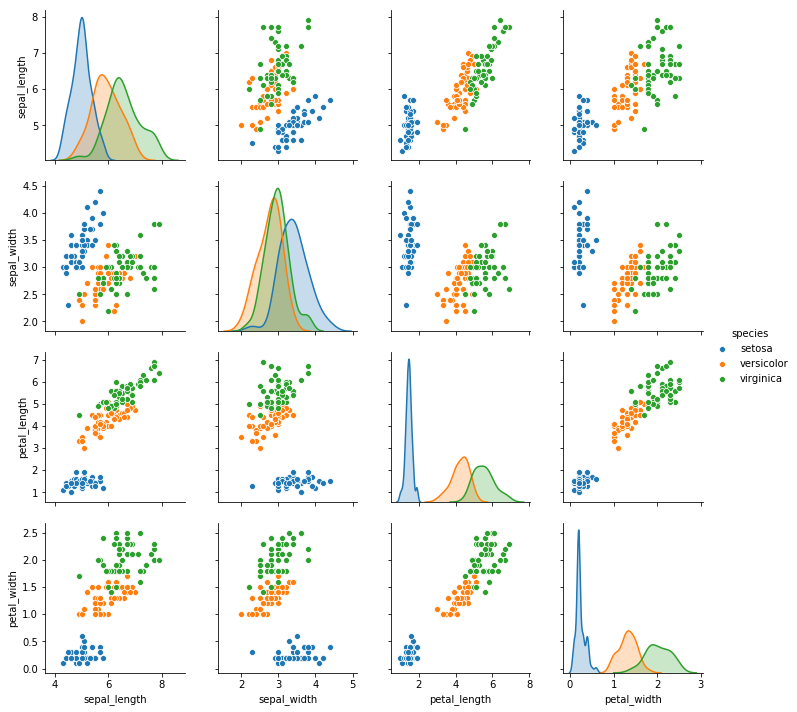

In [4]:

sns.pairplot(df.dropna(), hue='species') #this would only work if you called your dataframe df
;

From the scatterplot, it seems like the Setosa flowers are the smallest flowers and Virginica flowers are the largest flowers.  

### FIRST PART OF YOUR REPORT. ANALYSE AND DISCUSS THESE SUMAARY STATISTICS and THESE GRAPHS.
### What do they tell you about your data? About the relationship of the attributes, etc..

From the summary statistics of the dataset, sepal lengths range from 4.3 cm to 7.9 cm.  Sepal widths range from 2.0 cm to 4.4 cm.  Petal lengths range from 1.0 cm to 6.9 cm.  Petal widths range from 0.1 cm to 2.5 cm.  50% of flowers have sepal lengths between 5.1 and 6.4, sepal widths between 2.8 and 3.3, petal lengths between 1.6 and 5.1, and petal widths between 0.3 and 1.8.  

**Now, complete the following sections similar to example we did in class.**
##NOTE: The number of cells below does not mean the number of cells you need, you might complete the task with less or more cells

## EDA

C:\Users\cstol\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


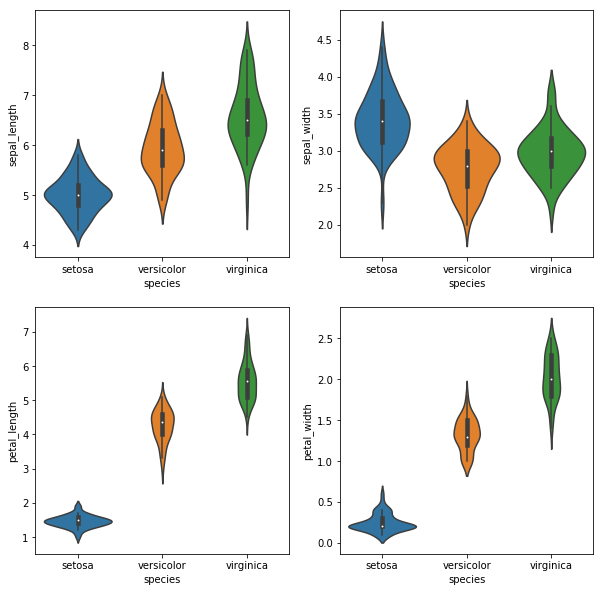

In [13]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(df):
    if column == 'species':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='species', y=column, data=df)

These violin plots show the relationships between species to measurements. The box plot elements show the median weight for setosa flowers is lower than for other species of flowers. The shape of the distribution (skinny on each end and wide in the middle) show that the measurements of virginica are highly concentrated around the median. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Train Test Split

Let's split up the data into a training set and a test set!

In [66]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop('species', axis = 1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [68]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [69]:
dtree = DecisionTreeClassifier()

In [70]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = dtree.predict(X_test)

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.79      0.88        14
   virginica       0.84      1.00      0.91        16

   micro avg       0.93      0.93      0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [73]:
print(confusion_matrix(y_test, predictions))

[[15  0  0]
 [ 0 11  3]
 [ 0  0 16]]


In [74]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Accuracy Score:  0.9333333333333333


Each row corresponds to a correct species, while columns represent the predicted species. For example, one species of versicolor were misclassified as virginica. There are 11 flowers predicted as iris setosa flowers, 16 predicted as iris versicolor flowers, and 18 predicted as iris virginica flowers. In reality, there are 11 iris setosa flowers, 15 iris versicolor flowers, and 19 iris viriginica flowers. 

## Tree Visualization

In [50]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['sepal_width', 'petal_length', 'petal_width', 'species']

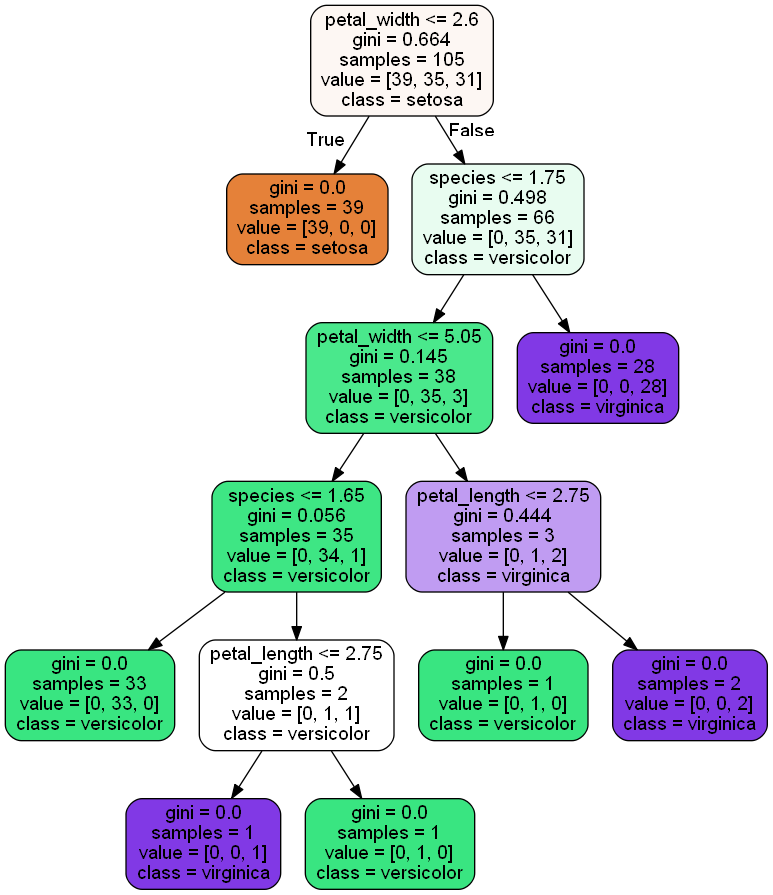

In [53]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, class_names = ['setosa', 'versicolor', 'virginica'], filled=True, rounded=True, max_depth=None)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

The Gini index is the measure of the impurity, the samples are the number of flowers left to classify, and the value is how many flowers are in class Setosa, how many flowers in class Versicolor, and how many flowers in class Virginica.  

I see that I have 105 flowers left to classify: 39 are setosa, 35 are versicolor, and 31 are virginica.  The root starts at how wide the petals are. 39 out of 105 flowers with petal widths less than or equal to 2.6 are classified as setosa.  This leaves 66 flowers left: 35 versicolor and 31 virginica. 

28 of 66 flowers are classified as virginica because they petal widths greater than 5.05.  1 flower with petal length of less than 2.75 is classified as versicolor and 2 flowers with petal length greater than 2.75 are classified as virginica.  1 flower with petal length less than 2.75 was classified as virginica and 1 flower with petal length greater than 2.75 is classified as versicolor. 

## Improve your results

***Using different values for the parameters come with DecisionTreeClassifier() method, try to improve your results..***

### *****SECOND PART OF YOUR REPORT: ANALYSE AND DISCUSS THESE HOW YOU IMPROVED YOUR RESULTS, WHAT HELPED AND WHY?****

### Decision Tree With Sepal Width

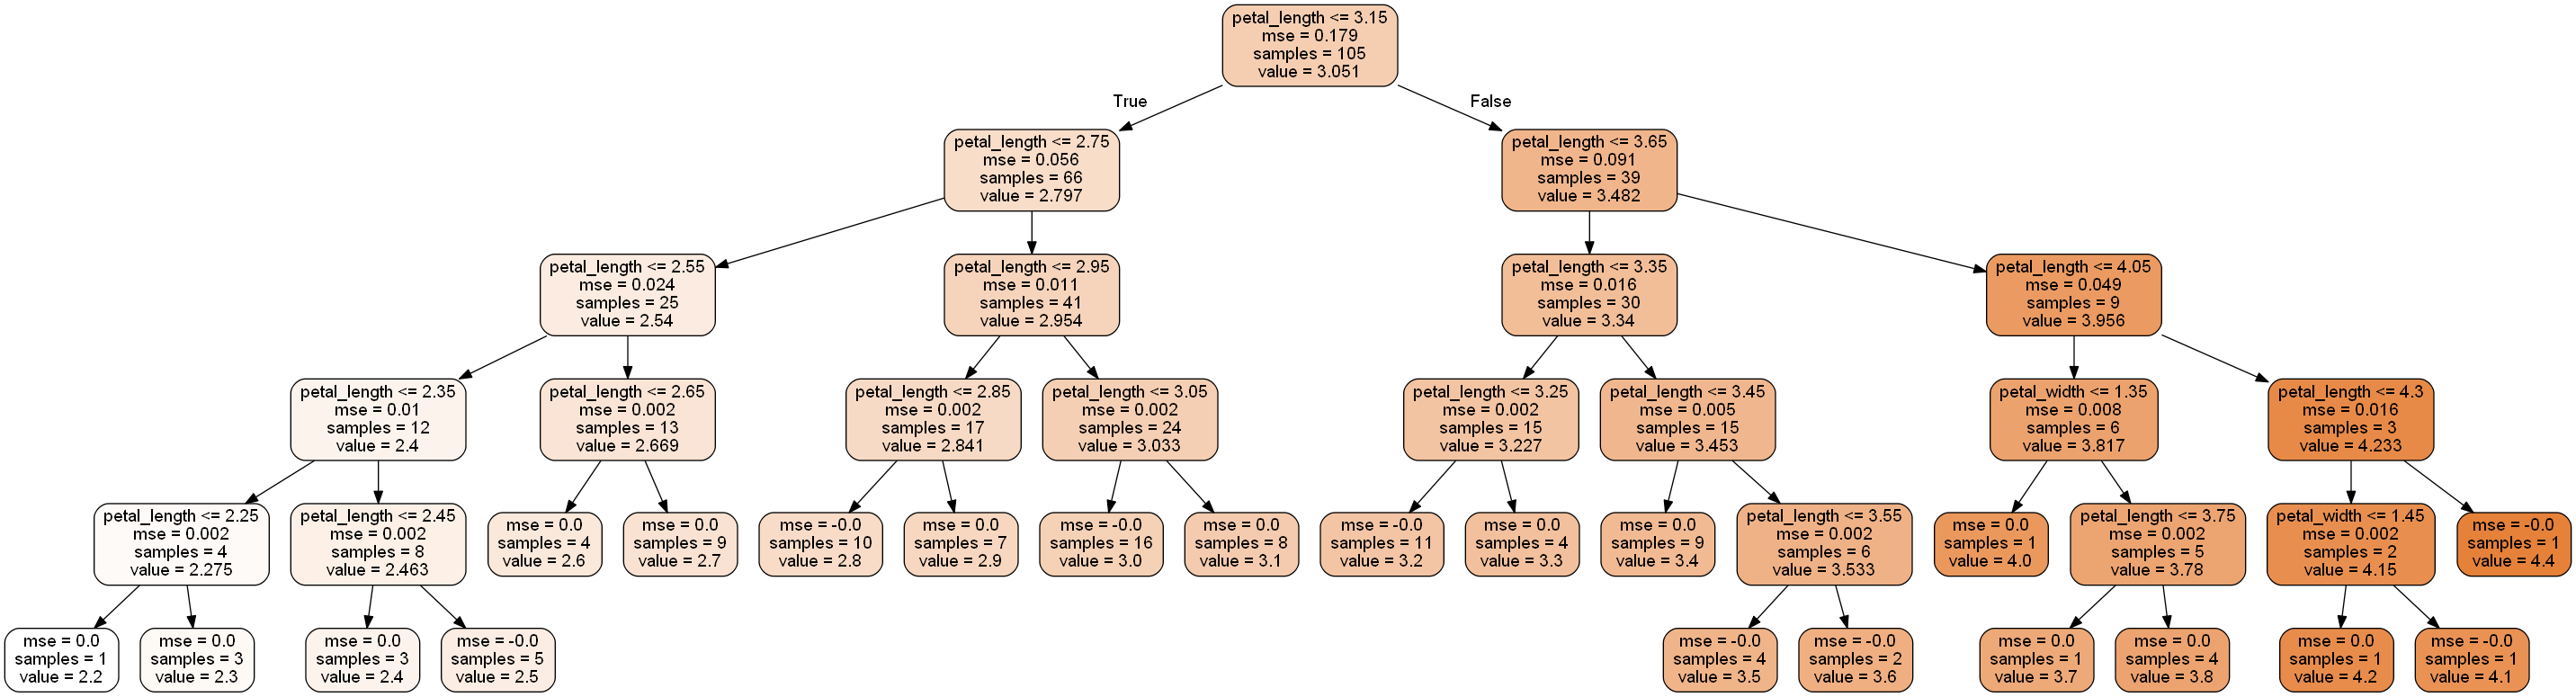

In [58]:
X = df.drop('species', axis = 1)
y = df['sepal_width']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, max_depth=None, class_names = ['setosa', 'versicolor', 'virginica'])

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Sepal width is a continuous attribute with floating point values, so I had to use the DecisionTreeRegressor() method.  Even so, just by looking at this decision tree, it was hard to determine which node belonged to which class. I do not think a decision tree is fit for continuous variables.  Therefore, I did not continue to make decision trees for the rest of the attributes.  